# MANIC REGRESSION: AUTO PRICING BY ANY MEANS NECESSARY
**_The search for normality and significance_**
### Data Science 410 BB
#### University of Washington Professional & Continuing Education
#### Homework 7: Comparing Linear Regression Models for log(Price)
#### Leo Salemann, 2/25/18


# Load Data, Setup some Functions

In [68]:
read.auto = function(file = '../../../DataScience410/Lecture1/Automobile price data _Raw_.csv'){
  ## Read the csv file
  autos <- read.csv(file, header = TRUE, 
                      stringsAsFactors = FALSE)

  ## Coerce some character columns to numeric
  numcols <- c('price', 'bore', 'stroke', 'horsepower', 'peak.rpm')
  autos[, numcols] <- lapply(autos[, numcols], as.numeric)

  ## Remove cases or rows with missing values. In this case we keep the 
  ## rows which do not have nas. 
  autos[complete.cases(autos), ]
  autos$logPrice = log(autos$price)
    
  ## drop symboling and normalized losses, from stack overflow.
  ## https://stackoverflow.com/questions/4605206/drop-data-frame-columns-by-name
  drops = c("symboling", "normalized.losses", "price")

  autos = autos[, !(names(autos) %in% drops)]
}
autos = read.auto()

head(autos, 3)

str(autos)

Warning message in lapply(autos[, numcols], as.numeric):
“NAs introduced by coercion”Warning message in lapply(autos[, numcols], as.numeric):
“NAs introduced by coercion”Warning message in lapply(autos[, numcols], as.numeric):
“NAs introduced by coercion”Warning message in lapply(autos[, numcols], as.numeric):
“NAs introduced by coercion”Warning message in lapply(autos[, numcols], as.numeric):
“NAs introduced by coercion”

make,fuel.type,aspiration,num.of.doors,body.style,drive.wheels,engine.location,wheel.base,length,width,⋯,engine.size,fuel.system,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,logPrice
alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,⋯,130,mpfi,3.47,2.68,9,111,5000,21,27,9.510075
alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,⋯,130,mpfi,3.47,2.68,9,111,5000,21,27,9.711116
alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,⋯,152,mpfi,2.68,3.47,9,154,5000,19,26,9.711116


'data.frame':	205 obs. of  24 variables:
 $ make             : chr  "alfa-romero" "alfa-romero" "alfa-romero" "audi" ...
 $ fuel.type        : chr  "gas" "gas" "gas" "gas" ...
 $ aspiration       : chr  "std" "std" "std" "std" ...
 $ num.of.doors     : chr  "two" "two" "two" "four" ...
 $ body.style       : chr  "convertible" "convertible" "hatchback" "sedan" ...
 $ drive.wheels     : chr  "rwd" "rwd" "rwd" "fwd" ...
 $ engine.location  : chr  "front" "front" "front" "front" ...
 $ wheel.base       : num  88.6 88.6 94.5 99.8 99.4 ...
 $ length           : num  169 169 171 177 177 ...
 $ width            : num  64.1 64.1 65.5 66.2 66.4 66.3 71.4 71.4 71.4 67.9 ...
 $ height           : num  48.8 48.8 52.4 54.3 54.3 53.1 55.7 55.7 55.9 52 ...
 $ curb.weight      : int  2548 2548 2823 2337 2824 2507 2844 2954 3086 3053 ...
 $ engine.type      : chr  "dohc" "dohc" "ohcv" "ohc" ...
 $ num.of.cylinders : chr  "four" "four" "six" "four" ...
 $ engine.size      : int  130 130 152 109 136 136 1

In [69]:
fields.numeric = c(
  'wheel.base',  
  'length',  
  'width',  
  'height',  
  'curb.weight',    
  'engine.size',   
  'bore',  
  'stroke',  
  'compression.ratio',
  'horsepower',
  'peak.rpm',
  'city.mpg',
  'highway.mpg',
  'logPrice')

fields = c(
  'make',
  'fuel.type',
  'aspiration',
  'num.of.doors',
  'body.style',
  'drive.wheels',  
  'engine.location',  
  'wheel.base',  
  'length',  
  'width',  
  'height',  
  'curb.weight',  
  'engine.type',  
  'num.of.cylinders',  
  'engine.size',  
  'fuel.system',  
  'bore',  
  'stroke',  
  'compression.ratio',
  'horsepower',
  'peak.rpm',
  'city.mpg',
  'highway.mpg',
  'logPrice')
autos[, fields.numeric] = lapply(autos[, fields.numeric],scale)
str(autos)

'data.frame':	205 obs. of  24 variables:
 $ make             : chr  "alfa-romero" "alfa-romero" "alfa-romero" "audi" ...
 $ fuel.type        : chr  "gas" "gas" "gas" "gas" ...
 $ aspiration       : chr  "std" "std" "std" "std" ...
 $ num.of.doors     : chr  "two" "two" "two" "four" ...
 $ body.style       : chr  "convertible" "convertible" "hatchback" "sedan" ...
 $ drive.wheels     : chr  "rwd" "rwd" "rwd" "fwd" ...
 $ engine.location  : chr  "front" "front" "front" "front" ...
 $ wheel.base       : num [1:205, 1] -1.687 -1.687 -0.707 0.173 0.107 ...
  ..- attr(*, "scaled:center")= num 98.8
  ..- attr(*, "scaled:scale")= num 6.02
 $ length           : num [1:205, 1] -0.425 -0.425 -0.231 0.207 0.207 ...
  ..- attr(*, "scaled:center")= num 174
  ..- attr(*, "scaled:scale")= num 12.3
 $ width            : num [1:205, 1] -0.843 -0.843 -0.19 0.136 0.229 ...
  ..- attr(*, "scaled:center")= num 65.9
  ..- attr(*, "scaled:scale")= num 2.15
 $ height           : num [1:205, 1] -2.015 -2.015 -0

stepAIC was raising missing row erros. Added na.omit() call per advice from stat.ethz.ch

In [70]:
autos = na.omit(autos)

# Stepwise Regression

Use the stepAIC function from the MASS package to perform stepwise regression starting with the linear model including all features. Which features are remain in the model? Evaluate this model using the summary and plot methods for your model object.

## Make a model, check it out before running stepAIC()

In [71]:
lm.autos = lm(logPrice ~ ., data = autos)
summary(lm.autos)


Call:
lm(formula = logPrice ~ ., data = autos)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.5180 -0.1097  0.0000  0.1313  0.4144 

Coefficients: (3 not defined because of singularities)
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             1.6628722  0.8238373   2.018 0.045482 *  
makeaudi                0.4551214  0.2698816   1.686 0.093983 .  
makebmw                 0.8778622  0.2809747   3.124 0.002172 ** 
makechevrolet          -0.1708941  0.2756292  -0.620 0.536271    
makedodge              -0.4626498  0.2263964  -2.044 0.042902 *  
makehonda               0.2020077  0.2660430   0.759 0.448965    
makeisuzu              -0.7323204  0.2982761  -2.455 0.015325 *  
makejaguar             -0.7154540  0.3375455  -2.120 0.035832 *  
makemazda              -0.0004909  0.2059808  -0.002 0.998102    
makemercedes-benz       0.0512764  0.3031271   0.169 0.865920    
makemercury             0.0160215  0.3555480   0.045 0.964124    
makemitsub

#### Okay, if we do nothing, we have an $R^2_{adj}$ of 0.9566. Now let's try running StepAIC()

In [74]:
library(MASS)
lm.step = stepAIC(lm.autos, direction = 'both')
lm.step$anova # ANOVA of the result 

Start:  AIC=-560.02
logPrice ~ make + fuel.type + aspiration + num.of.doors + body.style + 
    drive.wheels + engine.location + wheel.base + length + width + 
    height + curb.weight + engine.type + num.of.cylinders + engine.size + 
    fuel.system + bore + stroke + compression.ratio + horsepower + 
    peak.rpm + city.mpg + highway.mpg


Step:  AIC=-560.02
logPrice ~ make + fuel.type + aspiration + num.of.doors + body.style + 
    drive.wheels + wheel.base + length + width + height + curb.weight + 
    engine.type + num.of.cylinders + engine.size + fuel.system + 
    bore + stroke + compression.ratio + horsepower + peak.rpm + 
    city.mpg + highway.mpg


Step:  AIC=-560.02
logPrice ~ make + aspiration + num.of.doors + body.style + drive.wheels + 
    wheel.base + length + width + height + curb.weight + engine.type + 
    num.of.cylinders + engine.size + fuel.system + bore + stroke + 
    compression.ratio + horsepower + peak.rpm + city.mpg + highway.mpg

                    Df Sum 

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
,NA,NA,138,6.150269,-560.0182
- engine.location,0,1.776357e-15,138,6.150269,-560.0182
- fuel.type,0,5.506706e-14,138,6.150269,-560.0182
- stroke,1,1.448067e-04,139,6.150414,-562.0136
- horsepower,1,1.115619e-02,140,6.161570,-563.6603
- peak.rpm,1,8.962316e-03,141,6.170532,-565.3768


In [6]:
summary(lm.step) # Summary of the best model


Call:
lm(formula = logPrice ~ make + aspiration + num.of.doors + body.style + 
    drive.wheels + wheel.base + length + width + height + curb.weight + 
    engine.type + num.of.cylinders + engine.size + fuel.system + 
    bore + compression.ratio + city.mpg + highway.mpg, data = autos)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.5228 -0.1106  0.0000  0.1378  0.4255 

Coefficients: (1 not defined because of singularities)
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)             0.077260   0.488773   0.158 0.874627    
makeaudi                0.483305   0.251765   1.920 0.056920 .  
makebmw                 0.924413   0.246656   3.748 0.000259 ***
makechevrolet          -0.132809   0.248880  -0.534 0.594440    
makedodge              -0.413672   0.200620  -2.062 0.041047 *  
makehonda               0.237908   0.240178   0.991 0.323603    
makeisuzu              -0.700994   0.291531  -2.405 0.017492 *  
makejaguar             -0.625089   0.29749

#### So now we have 0.9574. For those keeping score:

|        |Resid. stderr|DoF|Mult. $R^2$|$R^2_{adj}$|F-statistic           |p-value  |
|--------|-------------|---|:----------|-----------|:---------------------|---------|
|Original|0.2111       |138|0.9691     |0.9566     |77.36 on 56 and 138 DF|< 2.2e-16|
|StepAIC |0.2092       |141|0.969      |0.9574     |83.23 on 53 and 141 DF|< 2.2e-16|

#### We've been able to move the Residual Standard Error and the $R^2$ metrics a smidge, but at least it was in the right direction. Let's compare some plots.

### Residuals vs. Fitted

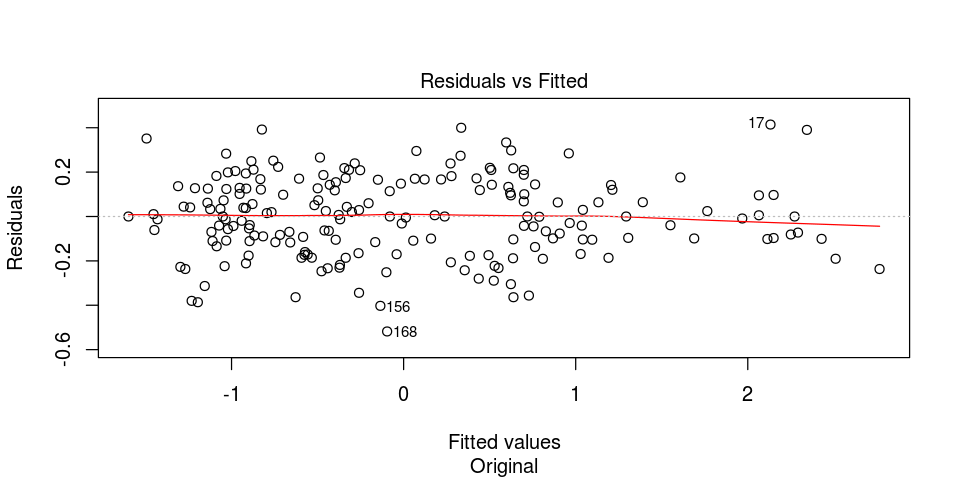

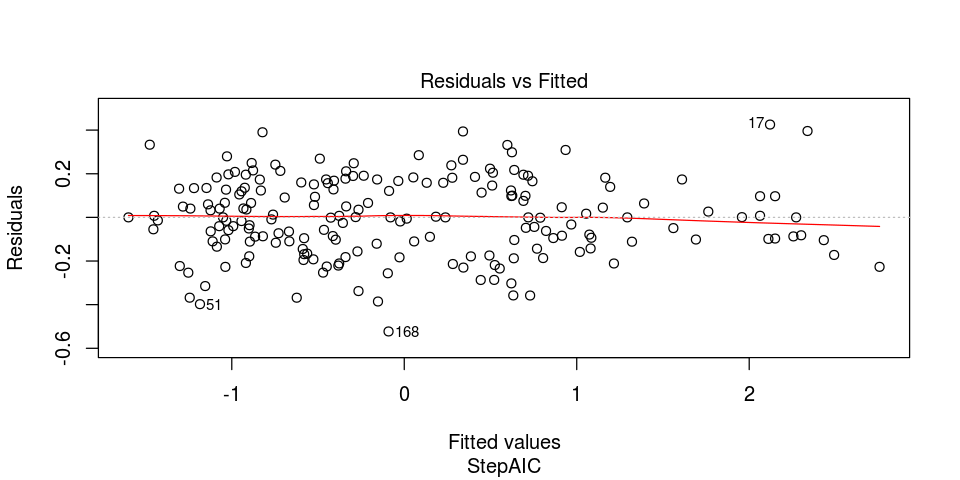

In [76]:
plot(lm.autos,  which =1, sub.caption="Original") 
plot(lm.step,   which =1, sub.caption="StepAIC") 

#### Pretty hard to see a difference, but we're expecting that, since we already know the Residual standard error didn't change much.

### Normal Q-Q

Warning message:
“not plotting observations with leverage one:
  18, 29, 43, 44, 47, 119”Warning message:
“not plotting observations with leverage one:
  18, 29, 43, 44, 47, 119”

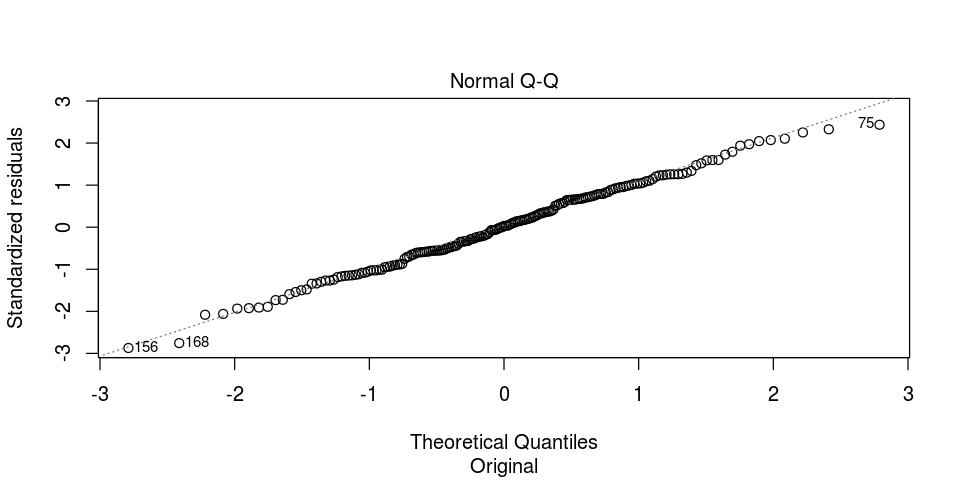

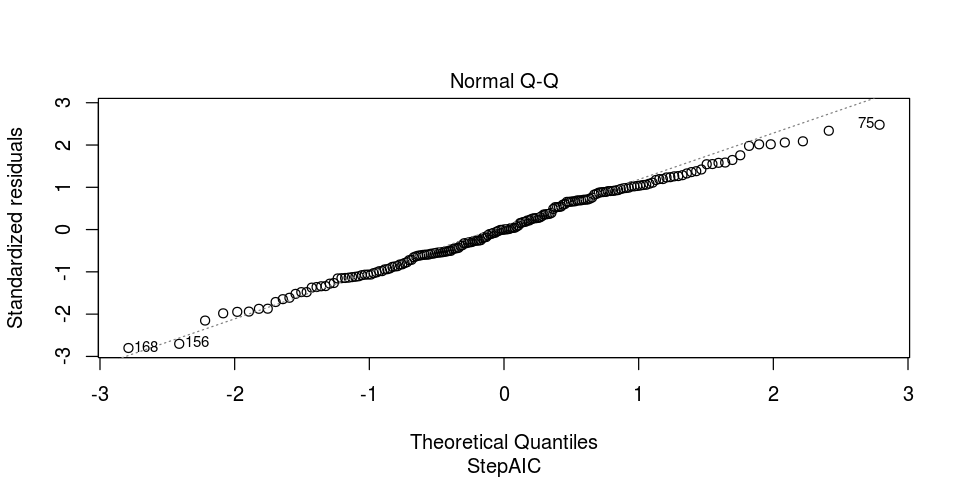

In [77]:
plot(lm.autos, which =2, sub.caption= "Original") 
plot(lm.step,  which =2, sub.caption= "StepAIC") 

#### The tails are actually a tad-bit more divergent for StepAIC vs. the original data. 

### $\sqrt{Standardized Residuals}$ vs. Fitted Values 

Warning message:
“not plotting observations with leverage one:
  18, 29, 43, 44, 47, 119”Warning message:
“not plotting observations with leverage one:
  18, 29, 43, 44, 47, 119”

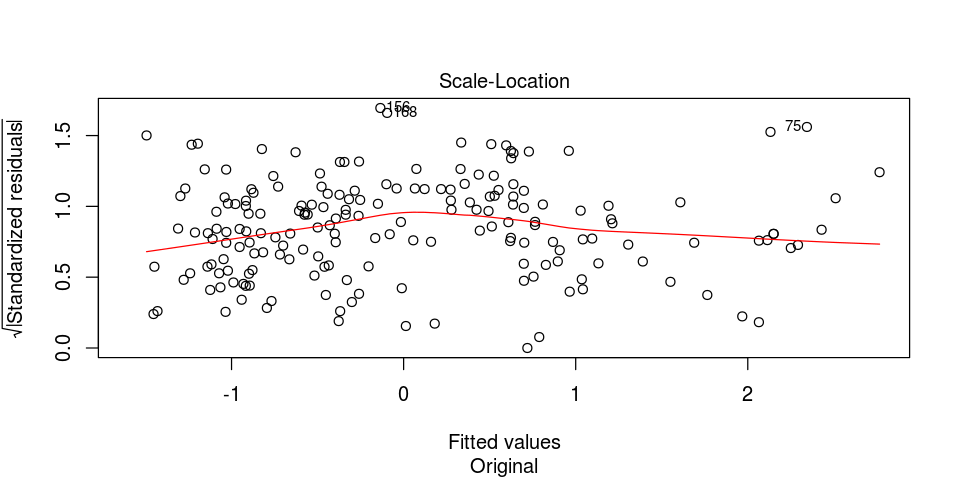

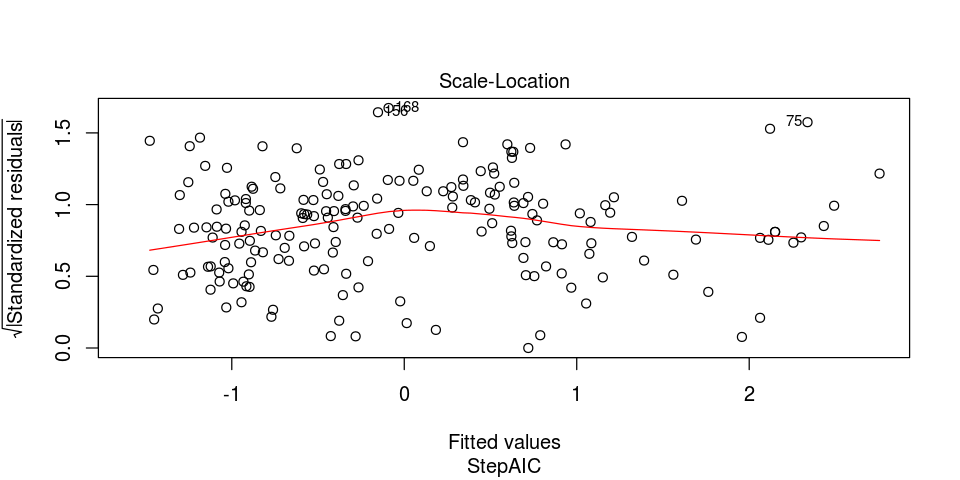

In [79]:
plot(lm.autos, which =3, sub.caption="Original") 
plot(lm.step,  which =3, sub.caption="StepAIC") 

#### The $\sqrt{Standardized Residuals}$ are slightly more bent for StepAIC, consistent with a slightly better fit to the data.

### Residuals vs. Leverage

Warning message:
“not plotting observations with leverage one:
  18, 29, 43, 44, 47, 119”Warning message in sqrt(crit * p * (1 - hh)/hh):
“NaNs produced”Warning message in sqrt(crit * p * (1 - hh)/hh):
“NaNs produced”Warning message:
“not plotting observations with leverage one:
  18, 29, 43, 44, 47, 119”Warning message in sqrt(crit * p * (1 - hh)/hh):
“NaNs produced”Warning message in sqrt(crit * p * (1 - hh)/hh):
“NaNs produced”

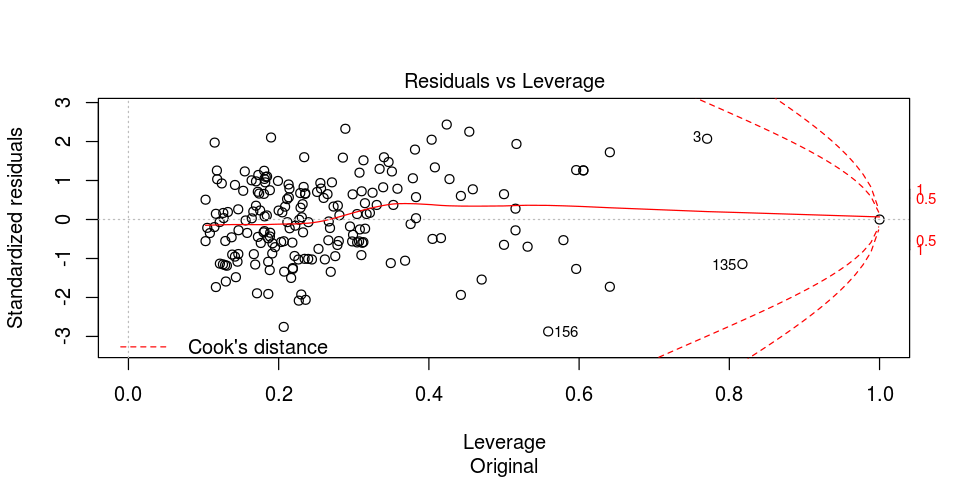

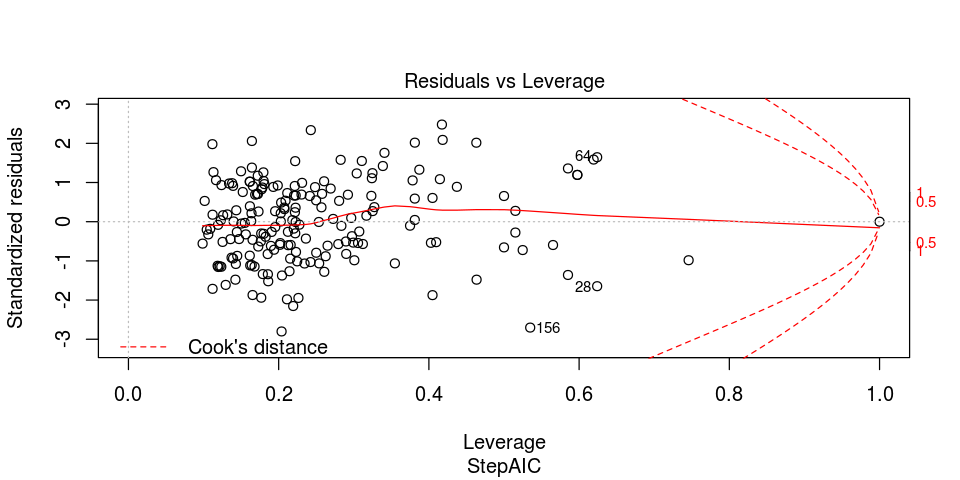

In [82]:
plot(lm.autos, which =5, sub.caption="Original")
plot(lm.step,  which =5, sub.caption="StepAIC")

#### Very little change in Standardized redicuals; but if you look close, you can see the StepAIC one is a bit more bent.

## Conclusions, Stepwise Regression
Well, that was fun.  The AIC is negative; so in this case, "bigger" AIC's (i.e. "more negative") is better. We started with an AIC of -560.02 and got it to -565.38 by dropping fuel.type, engine.location, stroke + compression.ratio, horsepower, peak.rpm.  The most significant features turned out to be height, curb weight, and if the Make was a BMW.

# SVD Regression

## Ceating a Matrix
Create a model matrix for all features using the model.matrix function with no intercept term (e.g. -1 in your model formula). Examine the first few rows of the model matrix. Notice how the categorical variables are encoded by a series of dummy variables. Does the coding make sense given the number of unique levels? 

In [8]:
mod.mat = model.matrix(logPrice ~ . -1, data = autos)
head(mod.mat, 3)

,makealfa-romero,makeaudi,makebmw,makechevrolet,makedodge,makehonda,makeisuzu,makejaguar,makemazda,makemercedes-benz,⋯,fuel.systemmpfi,fuel.systemspdi,fuel.systemspfi,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg
1,1,0,0,0,0,0,0,0,0,0,⋯,1,0,0,0.5127199,-1.8168335,-0.2876448,0.1698086,-0.261549,-0.6449741,-0.5447253
2,1,0,0,0,0,0,0,0,0,0,⋯,1,0,0,0.5127199,-1.8168335,-0.2876448,0.1698086,-0.261549,-0.6449741,-0.5447253
3,1,0,0,0,0,0,0,0,0,0,⋯,1,0,0,-2.3753537,0.6775033,-0.2876448,1.2525402,-0.261549,-0.9506844,-0.6899381


Each categorical feature gets decomposed into a series of binaries. So _make_ becomes _makeaudi_, _makebmw_, etc. Seems reasonable, since it these are categorical not ordinal.  There's no mathematical basis for stating _bmw > audio_ (everyone knows subarus are far superiour anyway ...)

## Computing the SVD
Next, compute the SVD of the model matrix. Examine the singular values and determine which diagonal elements of the inverse singular value matrix should be set to zero. You do not need to print or plot the singular vectors. A plot of the log values may help you understand the fall-off in singular values. 


In [9]:
svdM = svd(mod.mat)

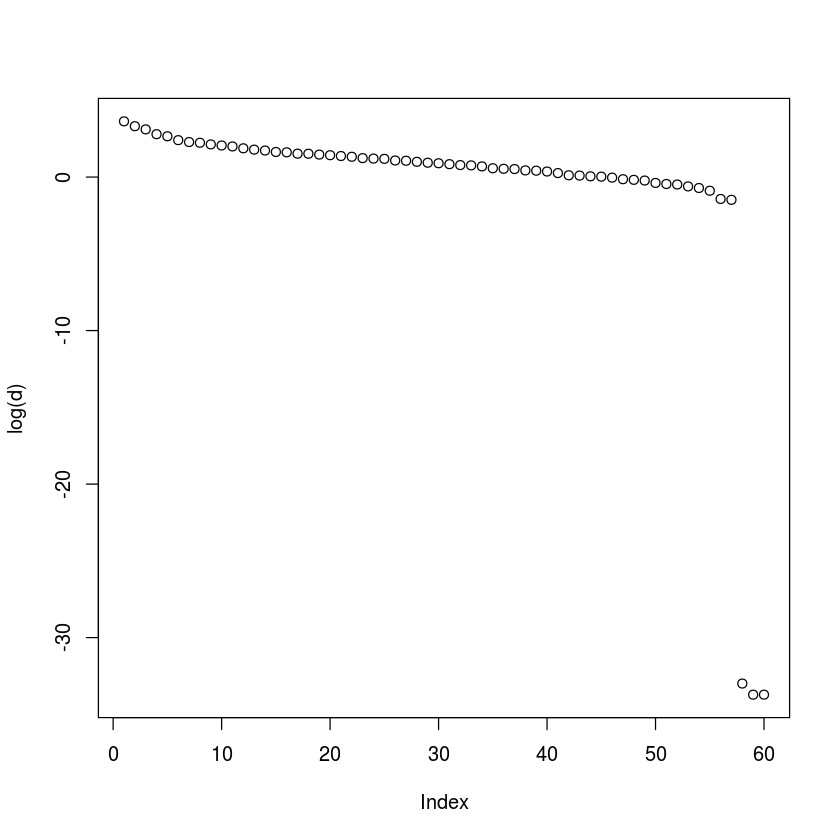

In [10]:
d = svdM$d
plot(log(d))

#### Last three singular values definetly need to be trimmed.

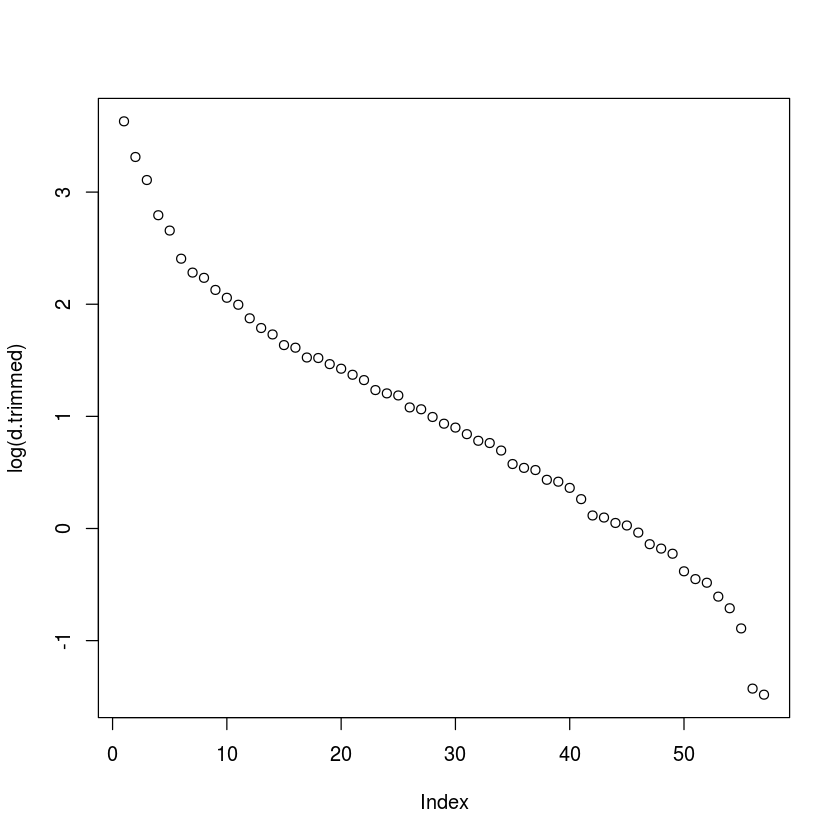

In [11]:
d.trimmed = d[1:(length(d)-3)]
plot(log(d.trimmed))

Hmm ... maybe trim 2 more off the end (for a total of 5), and perhaps a couple-few off the front.

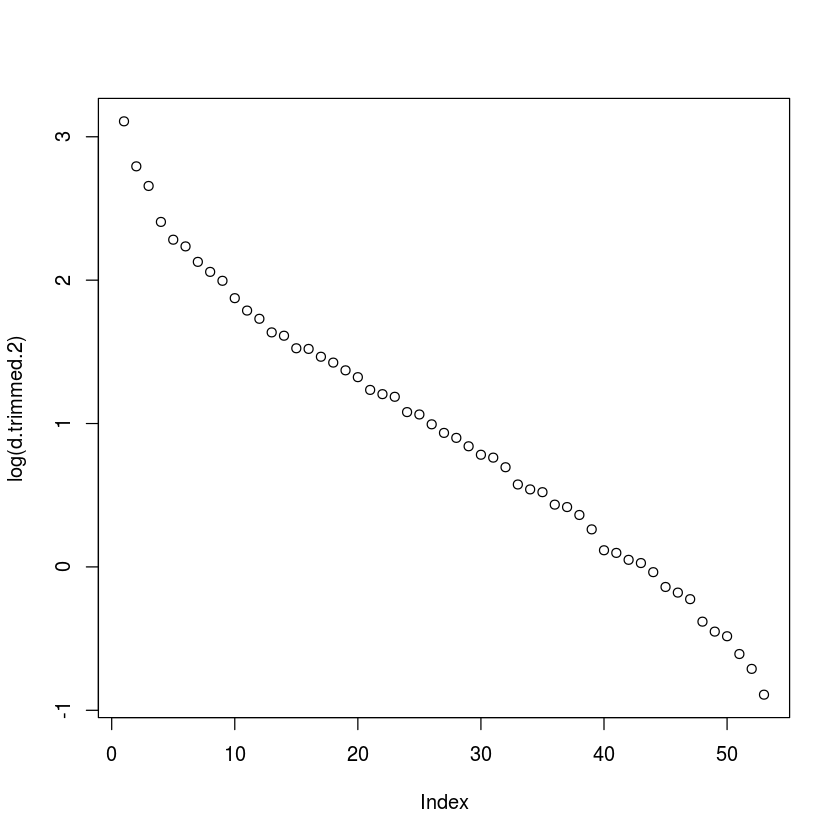

In [12]:
front.trim = 3         
end.trim = length(d) - 5
d.trimmed.2 = d[front.trim:end.trim]
plot(log(d.trimmed.2))

Go run the rest of the stuff, get this:

- SSE = 26.9249949865318 
- SSR = 172.30092154416 
- SST = 199.225916530692 
- RMSE = 0.139507746044206 
- Adjusted R^2 = 0.116940644923375 

Bleach. Lets try some more "trim values":

|front<br> trim |end<br> trim|SSE|SSR|SST|RMSE|Adjusted R^2|
|:-------------:|:----------:|:-:|:-:|:-:|:---|:-----------|
|0|1|192.931576434524|6.29434009616743|199.225916530692|0.999645473754012|0.967740881150598|
|0|2|193.075461566739|6.15045496395295|199.225916530692|1.00039099257378|0.968478306759932|
|0|3|193.063679845598|6.16223668509417|199.225916530692|1.00032994738652|0.968417924267607|
|0|4|192.849015609207|6.37690092148483|199.225916530692|0.999217697457031|0.967317748711688|
|0|5|192.766359017381|6.4595575133104|199.225916530692|0.998789424960525|0.966894125459902|
|0|6|192.640199829901|6.58571670079097|199.225916530692|0.998135750413994|0.966247547079849|
|0|7|192.610979167959|6.61493736273299|199.225916530692|0.997984348020512|0.966097788281938|
|1|3|29.6890699032377|169.536846627454|199.225916530692|0.153829377736983|0.131106803707988|
|2|3|29.1789575868575|170.046958943834|199.225916530692|0.151186308740194|0.128492427365236|
|3|3|27.2223158147479|172.003600715944|199.225916530692|0.141048268470196|0.118464443731079|
|3|5|26.9249949865318|172.30092154416|199.225916530692|0.139507746044206|0.116940644923375|
|7|7|16.0088097460831|183.217106784609|199.225916530692|0.0829472007569073|0.0609941101518992|

Looking at the table above, trimming 2 end values gives us ...
- the best largest SSE
- smallest SSR
- the adjusted R^2 closest to 1
- the largest RMSE

Also, trimming any of the "front" values is a terrible idea, no matter how "petty" i makes the log(d) plot.  We'll use an "end trim of 2" for the rest of the notebook.

#### Plot the trimmed log(d)

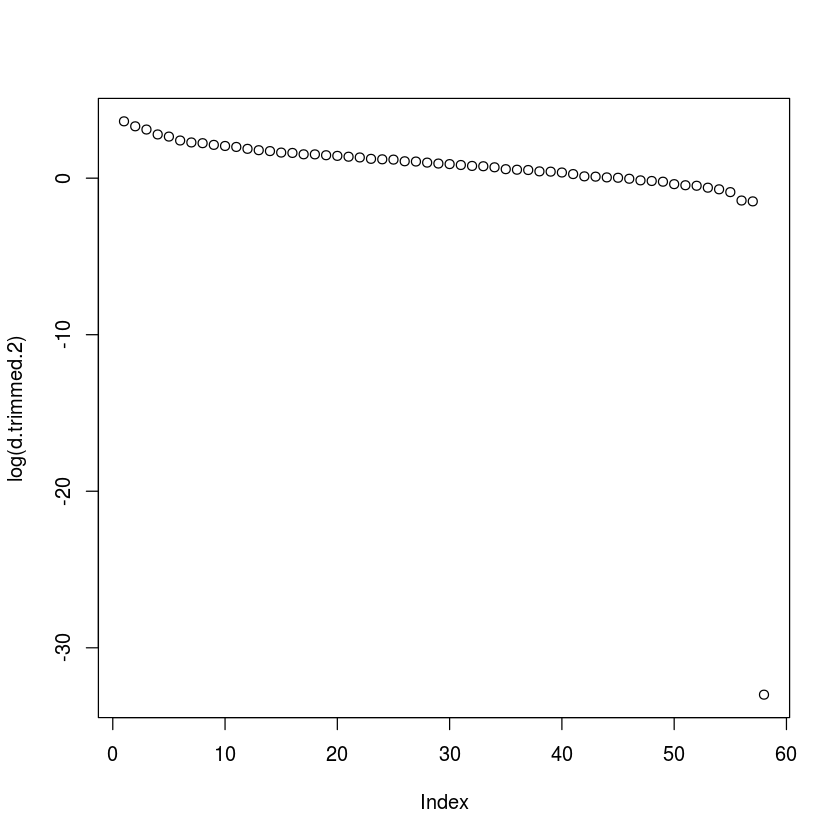

In [13]:
front.trim = 0
end.trim = length(d) - 2
d.trimmed.2 = d[front.trim:end.trim]
plot(log(d.trimmed.2))

#### Trim the inverted diagonal metrix.

In [14]:
D = diag(1/svdM$d)
# D[1:front.trim,1:front.trim] = 0.0

last = length(d)
D[end.trim:last,end.trim:last] = 0.0

head(D)
tail(D, 7)

0.02648895,0.000000,0.0000000,0.00000000,0.00000000,0.0000000,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0.00000000,0.036405,0.0000000,0.00000000,0.00000000,0.0000000,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0.00000000,0.000000,0.0447049,0.00000000,0.00000000,0.0000000,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0.00000000,0.000000,0.0000000,0.06119093,0.00000000,0.0000000,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0.00000000,0.000000,0.0000000,0.00000000,0.07016172,0.0000000,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0.00000000,0.000000,0.0000000,0.00000000,0.00000000,0.0901622,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


"[54,]",0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,2.036402,0.000000,0.000000,0.000000,0,0,0
"[55,]",0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0.000000,2.437638,0.000000,0.000000,0,0,0
"[56,]",0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0.000000,0.000000,4.169097,0.000000,0,0,0
"[57,]",0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0.000000,0.000000,0.000000,4.401038,0,0,0
"[58,]",0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0.000000,0.000000,0.000000,0.000000,0,0,0
"[59,]",0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0.000000,0.000000,0.000000,0.000000,0,0,0
"[60,]",0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0.000000,0.000000,0.000000,0.000000,0,0,0


In [15]:
cat('The pseudo inverse of the matrix')
mInv = svdM$v %*% D %*% t(svdM$u)
head(mInv, 3)
cat('The pseudo inverse times the matrix')
head(mInv %*% mod.mat, 3)

The pseudo inverse of the matrix

0.27097081,0.27097081,0.41328227,-0.1011243,-0.001945239,-0.04617017,0.02113997,0.02131142,0.062012215,-0.03058813,⋯,-0.024825057,-0.014632159,-0.012808629,-0.04439900,-0.04202092,0.03825769,0.050616261,-0.09925834,0.101854527,0.03075175
0.03021398,0.03021398,-0.10520409,0.4533298,0.164460643,0.10651586,0.08417342,0.08171696,0.065027215,-0.03036402,⋯,-0.030347165,-0.009940497,-0.019916791,0.05265278,0.04323145,-0.02073786,-0.042539856,0.07036589,-0.003199201,-0.06230912
-0.01096919,-0.01096919,-0.02283774,-0.1051637,0.018879195,-0.02576087,0.01250180,0.05359817,0.001169257,0.23777088,⋯,-0.006646232,-0.026907152,-0.009781953,0.01400518,0.03182012,0.03655122,0.005961345,0.02707807,-0.102768696,0.01175261


The pseudo inverse times the matrix

makealfa-romero,makeaudi,makebmw,makechevrolet,makedodge,makehonda,makeisuzu,makejaguar,makemazda,makemercedes-benz,⋯,fuel.systemmpfi,fuel.systemspdi,fuel.systemspfi,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg
0.95522388,-0.04477612,-0.04477612,-0.04477612,-0.04477612,-0.04477612,-0.04477612,-0.04477612,-0.04477612,-0.04477612,⋯,-9.714451e-17,-4.163336e-16,2.421023e-16,2.636780e-16,1.771153e-15,-3.149390e-15,9.619042e-16,1.516148e-15,-1.894318e-15,1.006140e-16
-0.04477612,0.95522388,-0.04477612,-0.04477612,-0.04477612,-0.04477612,-0.04477612,-0.04477612,-0.04477612,-0.04477612,⋯,5.551115e-17,-2.359224e-16,-2.631901e-17,-5.412337e-16,-1.804112e-15,-2.267284e-15,2.015749e-15,1.061651e-15,-9.436896e-16,-1.360023e-15
-0.04477612,-0.04477612,0.95522388,-0.04477612,-0.04477612,-0.04477612,-0.04477612,-0.04477612,-0.04477612,-0.04477612,⋯,1.224715e-15,1.301043e-16,1.672382e-16,1.405126e-15,1.239460e-15,4.742300e-16,3.690624e-16,1.240327e-16,1.039099e-15,8.690965e-16


In [16]:
head(mInv, 3)
nrow(mInv)
ncol(mInv)

0.27097081,0.27097081,0.41328227,-0.1011243,-0.001945239,-0.04617017,0.02113997,0.02131142,0.062012215,-0.03058813,⋯,-0.024825057,-0.014632159,-0.012808629,-0.04439900,-0.04202092,0.03825769,0.050616261,-0.09925834,0.101854527,0.03075175
0.03021398,0.03021398,-0.10520409,0.4533298,0.164460643,0.10651586,0.08417342,0.08171696,0.065027215,-0.03036402,⋯,-0.030347165,-0.009940497,-0.019916791,0.05265278,0.04323145,-0.02073786,-0.042539856,0.07036589,-0.003199201,-0.06230912
-0.01096919,-0.01096919,-0.02283774,-0.1051637,0.018879195,-0.02576087,0.01250180,0.05359817,0.001169257,0.23777088,⋯,-0.006646232,-0.026907152,-0.009781953,0.01400518,0.03182012,0.03655122,0.005961345,0.02707807,-0.102768696,0.01175261


[1] 60

[1] 195

In [17]:
head(autos, 3)
nrow(autos)
ncol(autos)

make,fuel.type,aspiration,num.of.doors,body.style,drive.wheels,engine.location,wheel.base,length,width,⋯,engine.size,fuel.system,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,logPrice
alfa-romero,gas,std,two,convertible,rwd,front,-1.6866429,-0.4254799,-0.8427194,⋯,0.07426712,mpfi,0.5127199,-1.8168335,-0.2876448,0.1698086,-0.261549,-0.6449741,-0.5447253,0.3184856
alfa-romero,gas,std,two,convertible,rwd,front,-1.6866429,-0.4254799,-0.8427194,⋯,0.07426712,mpfi,0.5127199,-1.8168335,-0.2876448,0.1698086,-0.261549,-0.6449741,-0.5447253,0.7187655
alfa-romero,gas,std,two,hatchback,rwd,front,-0.7068655,-0.2309477,-0.1901008,⋯,0.60257108,mpfi,-2.3753537,0.6775033,-0.2876448,1.2525402,-0.261549,-0.9506844,-0.6899381,0.7187655


[1] 195

[1] 24

## Computing the Weight Vector

In [18]:
bM = mInv %*% autos$logPrice
bM

0.151810424
0.606931826
1.029672630
-0.019083686
-0.310839344
0.353818108
-0.580509965
-0.563643619
0.151319534
0.203086815
0.167831902


## Evaluate the Model

`geom_smooth()` using method = 'loess'
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


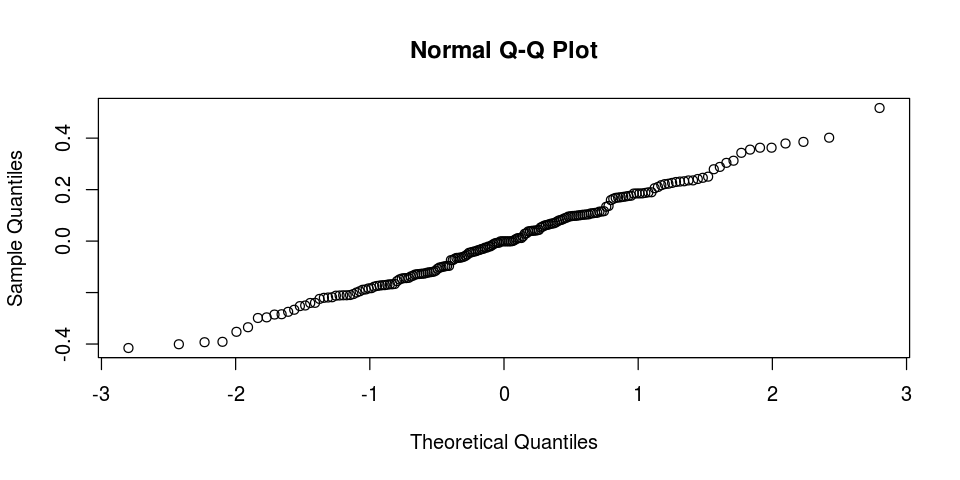

`geom_smooth()` using method = 'loess'


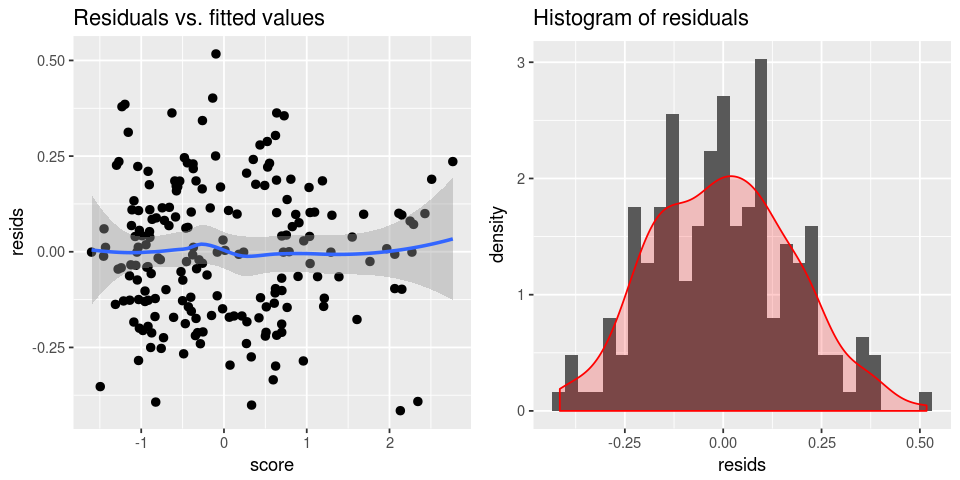

SSE = 193.075461566739 
SSR = 6.15045496395295 
SST = 199.225916530692 
RMSE = 1.00039099257378 
Adjusted R^2 = 0.968478306759932 


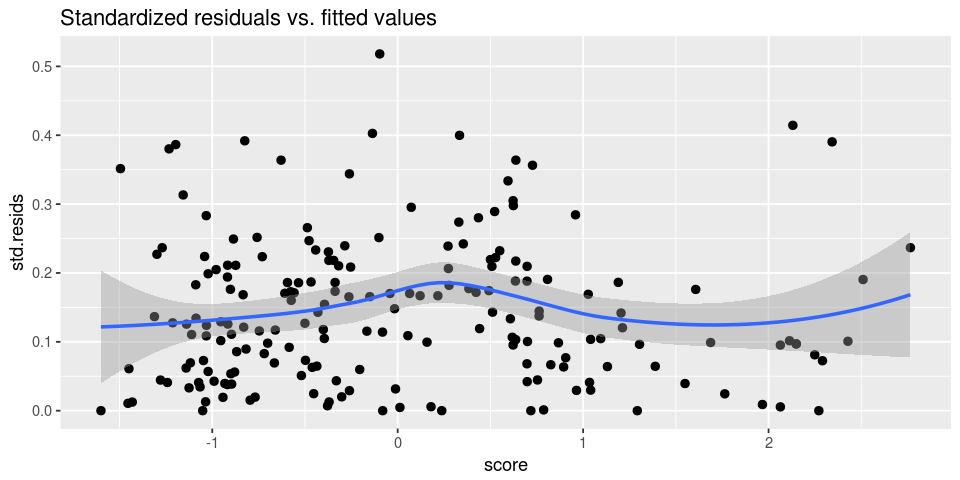

In [54]:
autos.svd = autos

autos.svd$score = mod.mat %*% bM + mean(autos.svd$logPrice)
autos.svd$resids = autos.svd$score - autos.svd$logPrice

require(repr)
options(repr.plot.width=8, repr.plot.height=4)

plot.resid.hist <- function(df, k = 4){
   ggplot(df, aes(resids)) +
           geom_histogram(aes(y = ..density..)) +
           geom_density(color = 'red', fill = 'red', alpha = 0.2) +
           ggtitle('Histogram of residuals') 
}

plot.svd.reg <- function(df, k = 4){
  require(ggplot2)
  require(gridExtra)
  
  p1 <- ggplot(df) + 
            geom_point(aes(score, resids), size = 2) + 
            stat_smooth(aes(score, resids)) +
            ggtitle('Residuals vs. fitted values')
 
  p2 <- ggplot(df, aes(resids)) +
           geom_histogram(aes(y = ..density..)) +
           geom_density(color = 'red', fill = 'red', alpha = 0.2) +
           ggtitle('Histogram of residuals')

  qqnorm(df$resids)
    
  grid.arrange(p1, p2, ncol = 2)
    
  df$std.resids = sqrt((df$resids - mean(df$resids))^2)  
    
  p3 = ggplot(df) + 
            geom_point(aes(score, std.resids), size = 2) + 
            stat_smooth(aes(score, std.resids)) +
            ggtitle('Standardized residuals vs. fitted values')
  print(p3) 
    
  n = nrow(df)
  Ybar = mean(df$logPrice)
  SST <- sum((df$logPrice - Ybar)^2)
  SSR <- sum(df$resids * df$resids)
  SSE = SST - SSR
  cat(paste('SSE =', as.character(SSE), '\n'))
  cat(paste('SSR =', as.character(SSR), '\n'))
  cat(paste('SST =', as.character(SSE + SSR), '\n'))
  cat(paste('RMSE =', as.character(SSE/(n - 2)), '\n'))

  adjR2  <- 1.0 - (SSR/SST) * ((n - 1)/(n - k - 1))
  cat(paste('Adjusted R^2 =', as.character(adjR2)), '\n')
}

plot.svd.reg(autos.svd)

# Elastic Net Regression

Elastic net regression is the combination of ridge regression and lasso regression. In this case use an alpha parameter of 0.5 to give equal weight to each regularization method. Using the model matrix you created for part 2 and the 1-d matrix of log price, compute a Gaussian regression model using 20 values of the regularization parameter lambda.

In [20]:
require(glmnet)
b = as.matrix(autos$logPrice) #must be matrix, NOT dataframe
mod.lasso = glmnet(mod.mat, b, family = 'gaussian', nlambda = 20, alpha = 0.5)

Loading required package: glmnet
Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-13



#### Plot and examine the evaluation of the parameter values and deviance with lambda.

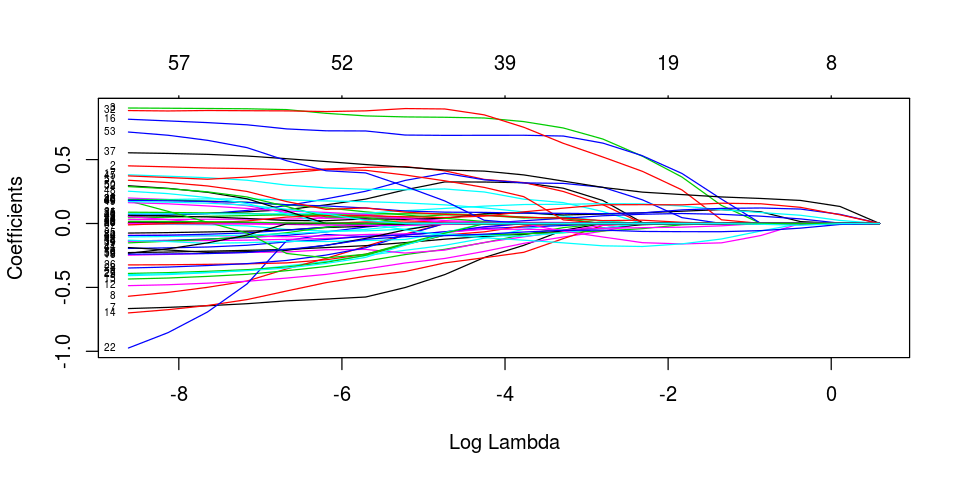

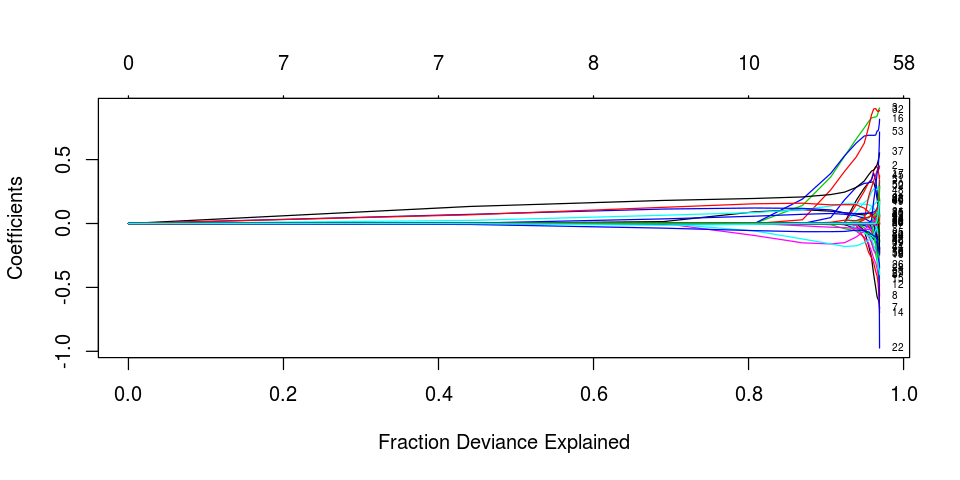

In [21]:
plot(mod.lasso, xvar = 'lambda', label = TRUE)
plot(mod.lasso, xvar = 'dev', label = TRUE)

#### Compute the scores using the predict method. 

`geom_smooth()` using method = 'loess'
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


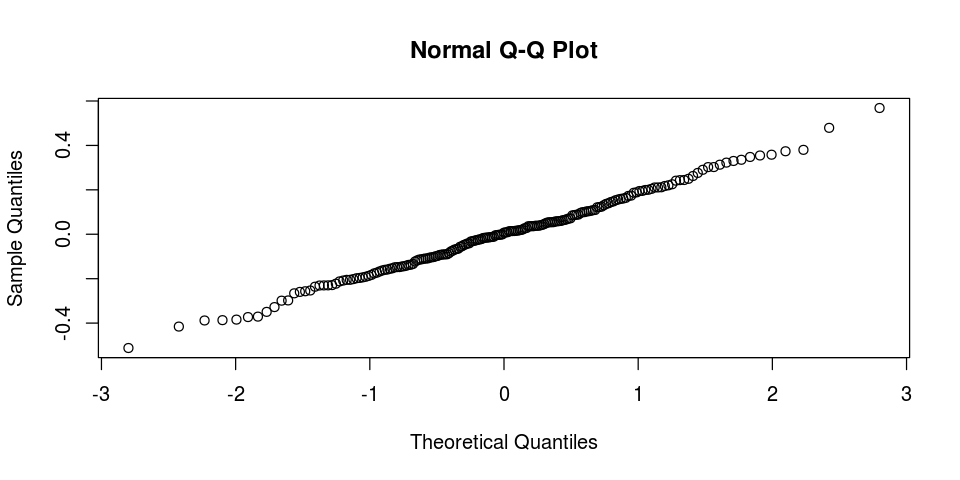

`geom_smooth()` using method = 'loess'


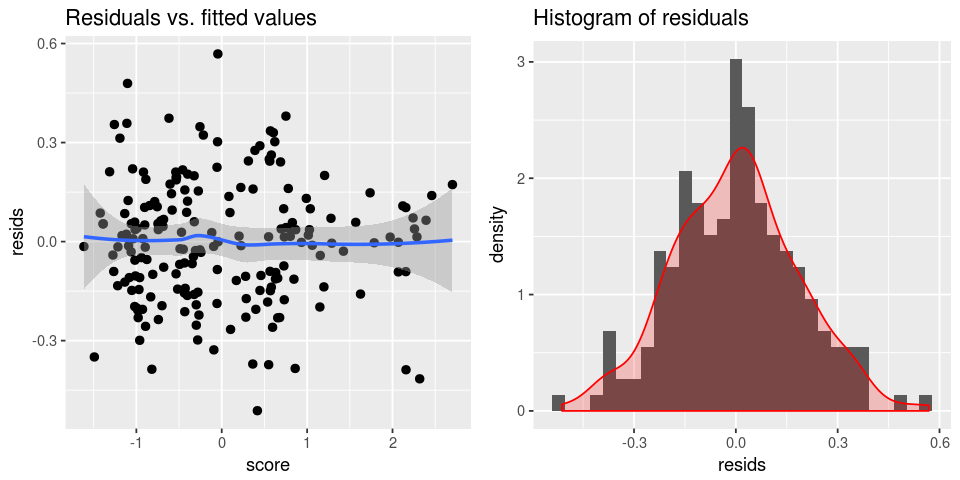

SSE = 192.653243924115 
SSR = 6.57267260657718 
SST = 199.225916530692 
RMSE = 0.998203336394376 
Adjusted R^2 = 0.966314399359691 


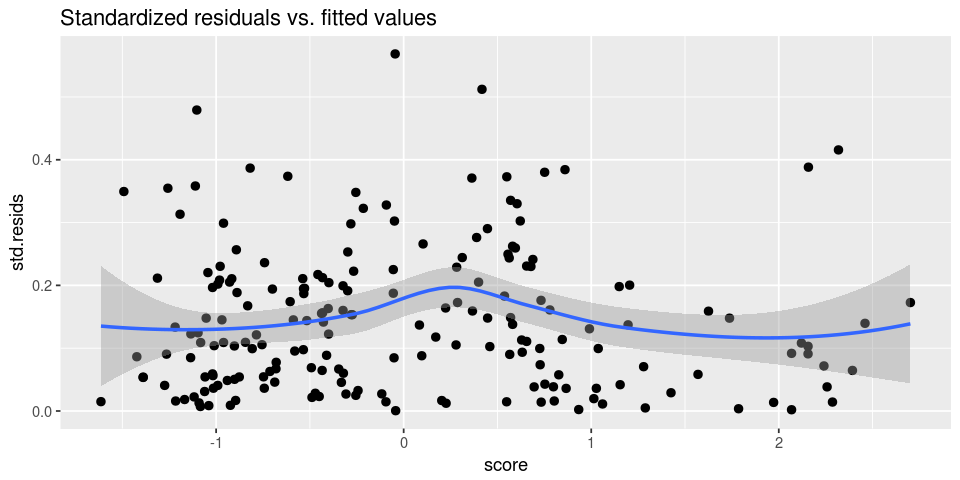

In [22]:
autos.enet = autos
autos.enet$score = predict(mod.lasso, newx = mod.mat)[, 15]
autos.enet$resids = autos.enet$score - autos.enet$logPrice

plot.svd.reg(autos.enet)

#### Model Evaluation

Choose a value of lambda (a column in the scores matrix) and evaluate your model. You may need to try several lambda’s to find one which gives good overall performance.

#### Examining the scores matrix

In [23]:
print(mod.lasso)


Call:  glmnet(x = mod.mat, y = b, family = "gaussian", alpha = 0.5,      nlambda = 20) 

      Df   %Dev    Lambda
 [1,]  0 0.0000 1.8090000
 [2,]  7 0.4402 1.1140000
 [3,]  8 0.6901 0.6860000
 [4,] 10 0.8076 0.4225000
 [5,] 13 0.8695 0.2602000
 [6,] 16 0.9060 0.1602000
 [7,] 19 0.9239 0.0986800
 [8,] 28 0.9389 0.0607700
 [9,] 32 0.9492 0.0374300
[10,] 34 0.9548 0.0230500
[11,] 39 0.9586 0.0141900
[12,] 43 0.9614 0.0087410
[13,] 49 0.9640 0.0053830
[14,] 51 0.9659 0.0033150
[15,] 52 0.9670 0.0020420
[16,] 56 0.9678 0.0012570
[17,] 56 0.9685 0.0007744
[18,] 58 0.9688 0.0004769
[19,] 57 0.9689 0.0002937
[20,] 58 0.9690 0.0001809


#### A function to help evaluate models

In [24]:
try.lambda = function(svdM, lambda, M1, M2, V2) {
    d.trim = 1/ (svdM$d + lambda)
    mD = diag(d.trim)
    mInv = svdM$v %*% mD %*% t(svdM$u)
    b2 = mInv %*% V2
    M1$score = M2 %*% b2 + mean(V2)
    M1$resids = M1$score - V2
    plot.svd.reg(M1)
}

#### Run an evaluation

`geom_smooth()` using method = 'loess'
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


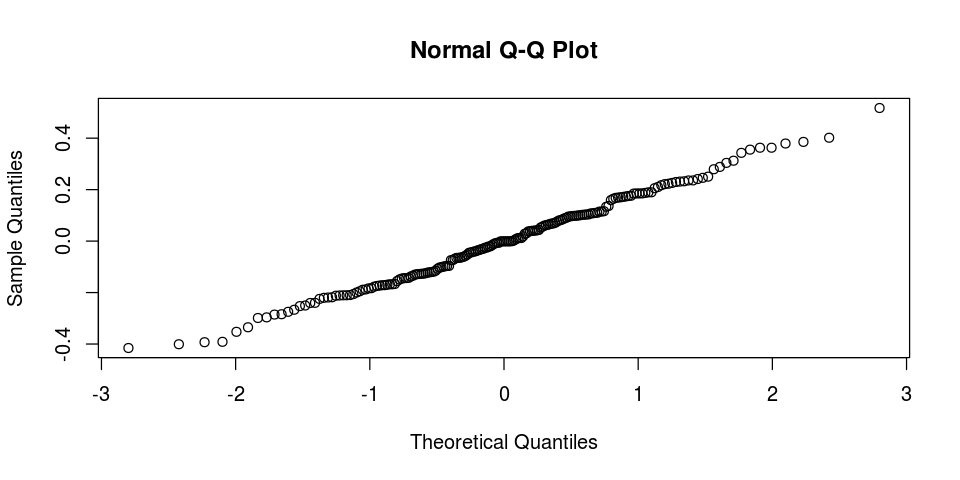

`geom_smooth()` using method = 'loess'


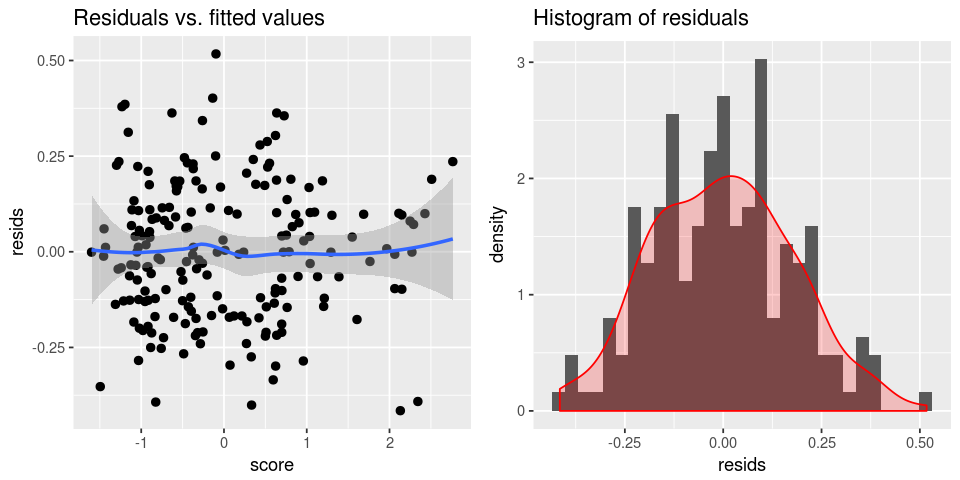

SSE = 193.075460951151 
SSR = 6.15045557954122 
SST = 199.225916530692 
RMSE = 1.0003909893842 
Adjusted R^2 = 0.96847830360498 


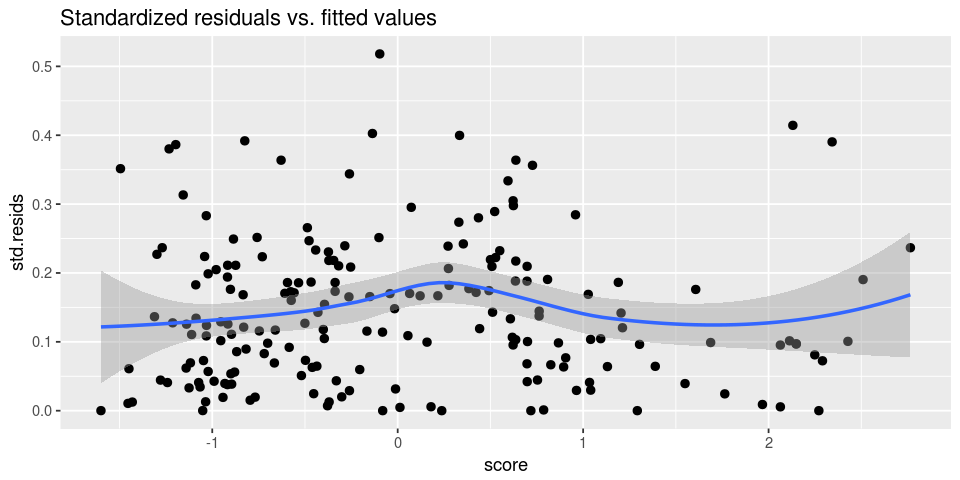

In [25]:
try.lambda(svdM, 0.0001809, autos.enet, mod.mat, autos.enet$logPrice)

#### Run more evaluations

|lambda   |SSE         |SSR|SST|RMSE|Adjusted R^2|
|--------:|:-----------|:-:|:-:|:--:|:-----------|
|0.0001809|193.075460951151|6.15045557954122|199.225916530692|1.0003909893842|0.96847830360498|
|0.0002937|193.07546022349|6.15045630720206|199.225916530692|1.00039098561394|0.968478299875646|
|0.0004769|193.075458480144|6.15045805054744|199.225916530692|1.00039097658106|0.968478290940828|
|0.0007744|193.075454172198|6.15046235849399|199.225916530692|1.00039095426009|0.968478268862173|
|1.8090000|189.203062033594|10.0228544970974|199.225916530692|0.980326746288053|0.948631874113539|

SSE, SSR, SST, RMSE and Adjsuted R^2 all look best for the smallest lambda (0.0001809)

In [26]:
cat('Compute and print the inverse singular value matrix')
lambda = 1.0
d.trim = 1/ (svdM$d + lambda)
mD = diag(d.trim)
mD
cat('Compute and print the pseudo inverse')
mInv = svdM$v %*% mD %*% t(svdM$u)
mInv
MTMTM = mInv %*% (M)
MTMTM


b2 = mInv %*% males.ext$childHeight
b2


males.ext$score = M %*% b2 + mean(males.ext$childHeight)
males.ext$resids = males.ext$score - males.ext$childHeight

plot.svd.reg(males.ext)

Compute and print the inverse singular value matrix

0.02580539,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.0000000,0.0000000,⋯,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0,0,0
0.00000000,0.03512623,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.0000000,0.0000000,⋯,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0,0,0
0.00000000,0.00000000,0.04279189,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.0000000,0.0000000,⋯,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0,0,0
0.00000000,0.00000000,0.00000000,0.05766251,0.00000000,0.00000000,0.00000000,0.00000000,0.0000000,0.0000000,⋯,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0,0,0
0.00000000,0.00000000,0.00000000,0.00000000,0.06556179,0.00000000,0.00000000,0.00000000,0.0000000,0.0000000,⋯,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0,0,0
0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.08270531,0.00000000,0.00000000,0.0000000,0.0000000,⋯,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0,0,0
0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.09261215,0.00000000,0.0000000,0.0000000,⋯,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0,0,0
0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.09661289,0.0000000,0.0000000,⋯,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0,0,0
0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.1064469,0.0000000,⋯,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0,0,0
0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.0000000,0.1132798,⋯,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0,0,0
0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.0000000,0.0000000,⋯,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0,0,0


Compute and print the pseudo inverse

0.1323960148,0.1885568695,0.2235817947,-0.0153716658,-0.0372855354,-0.0273244746,2.794049e-02,0.0156626544,1.843474e-02,-0.0040909774,⋯,-1.023924e-02,-8.010113e-04,-0.0029297536,-0.025502253,-0.0274408728,0.0234688262,0.0218541732,-0.0262023797,0.0259869605,0.0227883649
-0.0166133845,0.0395474702,-0.0408778770,0.2482937788,0.0712767180,0.0785944470,7.179176e-02,0.0630058083,5.632874e-02,-0.0037852727,⋯,-9.398656e-03,-2.225956e-03,-0.0040571867,0.022374609,0.0207630630,-0.0131621905,-0.0039200313,0.0013072408,-0.0038400084,-0.0254027108
-0.0346210808,0.0215397739,-0.0052171907,-0.0252427350,-0.0332429699,-0.0225858425,2.278022e-02,0.0321557770,1.912643e-03,0.1389961839,⋯,-7.154702e-03,-1.612424e-02,-0.0061757763,0.006190988,0.0164322746,0.0061433709,-0.0003186901,-0.0071167898,-0.0463553438,-0.0029072318
-0.0174162401,0.0387446146,-0.0338001040,-0.0186383996,-0.0498921754,-0.0188280366,4.557731e-02,0.0241275403,4.447010e-04,0.0017727223,⋯,-7.347635e-03,-6.957883e-03,-0.0126579656,0.020738635,0.0149091322,-0.0094295515,-0.0158453855,-0.0076272877,-0.0010656297,0.0025019141
-0.0174481023,0.0387127524,-0.0462202872,-0.0248894608,-0.0421514080,-0.0267601377,4.496891e-02,0.0125225422,6.306484e-03,0.0004543941,⋯,-1.957696e-03,1.408660e-02,0.0012238666,0.013709948,0.0007114172,-0.0014837894,-0.0107922543,-0.0017837126,-0.0161946224,-0.0282489662
-0.0039291911,0.0522316636,-0.0653435825,-0.0287477361,-0.0294106896,-0.0196689885,2.647444e-02,0.0100085264,8.973044e-05,-0.0069622611,⋯,-1.024496e-02,-5.657225e-03,-0.0091654700,0.012980936,0.0093623893,-0.0090775545,0.0039450738,0.0125683651,-0.0162589898,-0.0024103040
-0.0356833938,0.0204774609,-0.0229800337,-0.0250485887,-0.0598324422,-0.0299487838,4.695149e-02,0.0497168921,1.400230e-02,0.0062005974,⋯,-6.424946e-03,-1.953232e-02,-0.0068044060,-0.023569428,-0.0109245553,0.0201901784,0.0269100306,0.0013523950,-0.0037569139,0.0120158972
-0.0406228312,0.0155380235,-0.0002521057,0.0193608882,-0.0624743054,-0.0194242595,2.879620e-02,0.0043405499,7.976755e-03,0.0683599486,⋯,-4.507662e-03,-5.605569e-03,-0.0054577473,0.052285239,0.0514687369,-0.0329854200,0.0197604430,0.0166761859,-0.0382143014,-0.0650660966
-0.0307539584,0.0254068963,-0.0232667506,-0.0200093716,-0.0136464767,-0.0029860681,5.913370e-03,0.0042784153,-2.837861e-03,0.0056719342,⋯,-8.686941e-03,-8.231936e-03,-0.0053606977,0.002535204,0.0056127864,-0.0041746136,0.0045761492,-0.0146400194,0.0055836127,-0.0004945754
-0.0298046241,0.0263562306,-0.0152208364,0.1599536489,-0.0346840741,-0.0160907076,-3.962935e-02,-0.0495786852,-8.882573e-02,0.0012508458,⋯,-2.375764e-03,2.879308e-03,-0.0026492110,0.033983735,0.0281367380,-0.0163121121,-0.0051817029,0.0012760383,-0.0340692405,-0.0591031189
-0.0305982871,0.0255625676,-0.0075216238,-0.0287202477,-0.0083974303,0.0176926996,2.666011e-02,0.0260912571,-4.658270e-02,-0.0069448992,⋯,5.825150e-03,4.973528e-03,0.0048347663,-0.050869653,-0.0507956884,0.0019296976,-0.0684407420,0.0492724671,0.0338885006,0.0149789880


ERROR: Error in eval(expr, envir, enclos): object 'M' not found


# Evaluate & Compare

To evaluate and compare these models use both summary statistics and plots of the residuals. How similar or different is the performance? Do you consider any of these models to be a good fit to the data?

Note, we are ignoring the obvious bias problem which arises from evaluating a model using the same data used to train the model.

## Summary Statistics

|Type       |Adjusted R^2|
|:----------|:------------|
|StepAIC    |0.9574 |
|SVD        |0.968478306759932|
|Elastic Net|0.96847830360498|




SVD outperforms Elastic Net by a smidge; both out perform StepAIC. ElasticNet could probably outpeform SVD if we tried more than 20 lambda values.

## Graphical Comparison

Now we'll create linear models of the SVD and Elastic Network dataframes, so we can use the same graphs as the stepwise model.

In [ ]:
lm.svd = lm(logPrice ~ ., data = autos.svd)
lm.enet = lm(logPrice ~ ., data = autos.enet)

### Residuals vs. Fitted

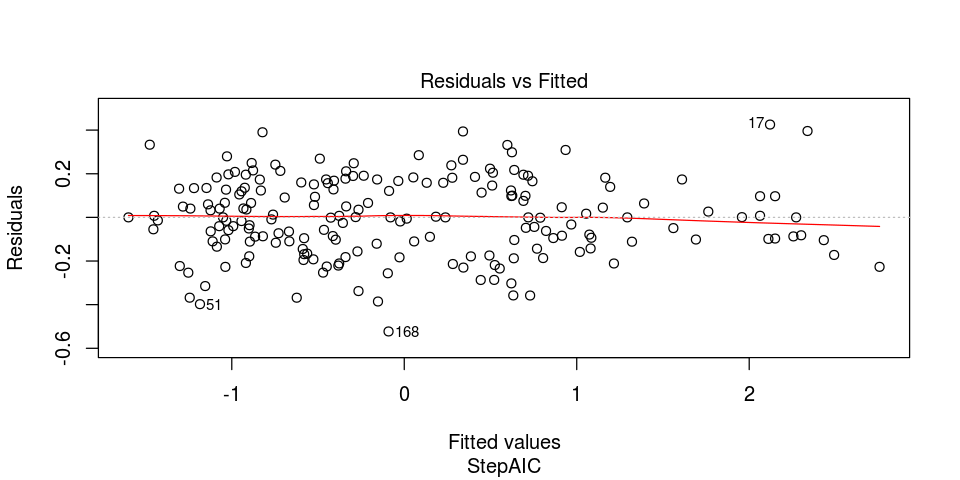

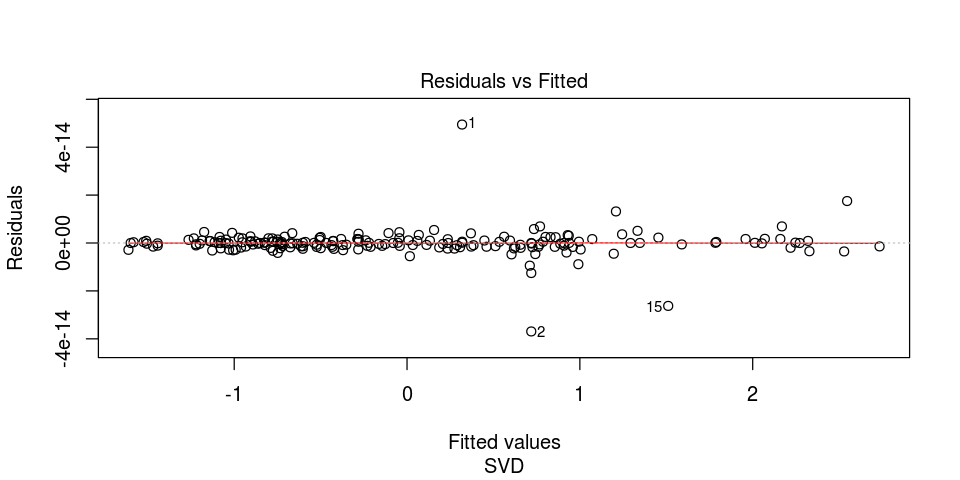

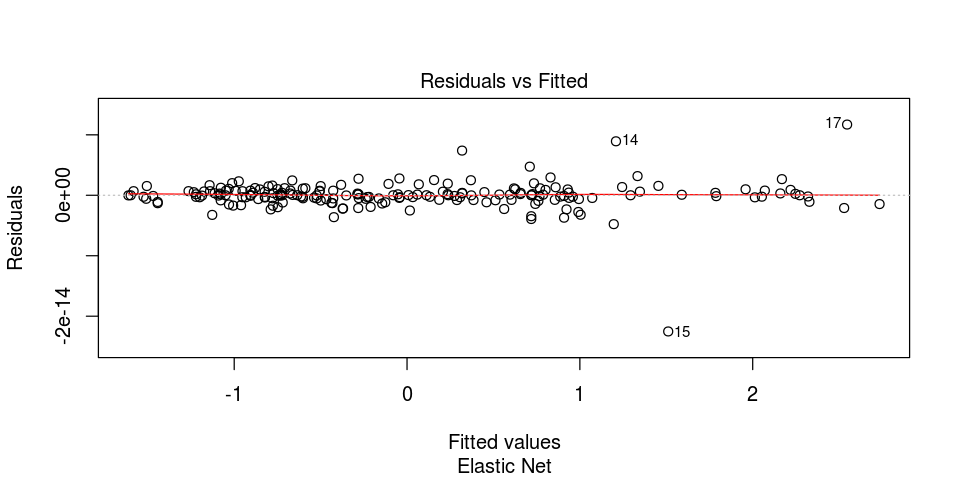

In [47]:
plot(lm.step, which =1, sub.caption="StepAIC") 
plot(lm.svd,  which =1, sub.caption="SVD") 
plot(lm.enet, which =1, sub.caption="Elastic Net") 

Residuals vs. Fitted are significantly tighter for SVD and Elastic Net compared to Stepwise. Studying the y axis, Elastic Net appears slightly tighter

### Normal Q-Q

Warning message:
“not plotting observations with leverage one:
  18, 29, 43, 44, 47, 119”Warning message:
“not plotting observations with leverage one:
  18, 29, 43, 44, 47, 119”

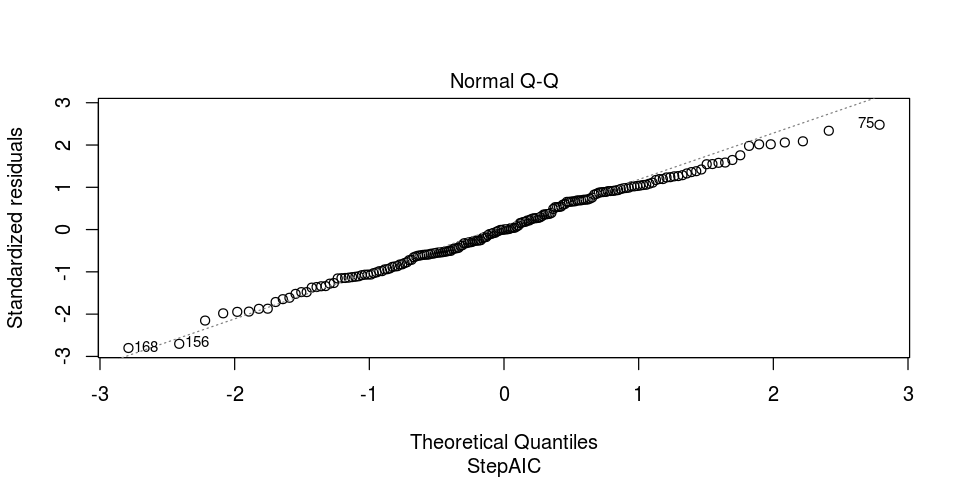

Warning message:
“not plotting observations with leverage one:
  18, 29, 43, 44, 47, 119”

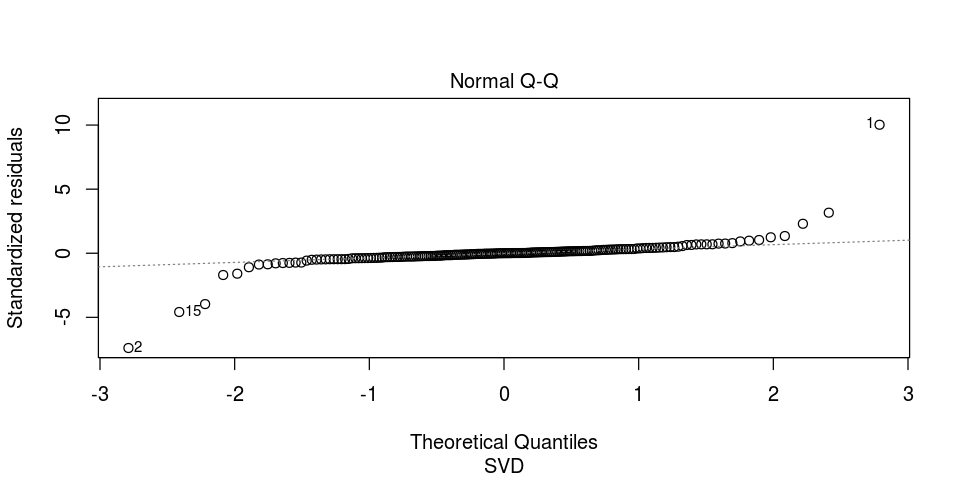

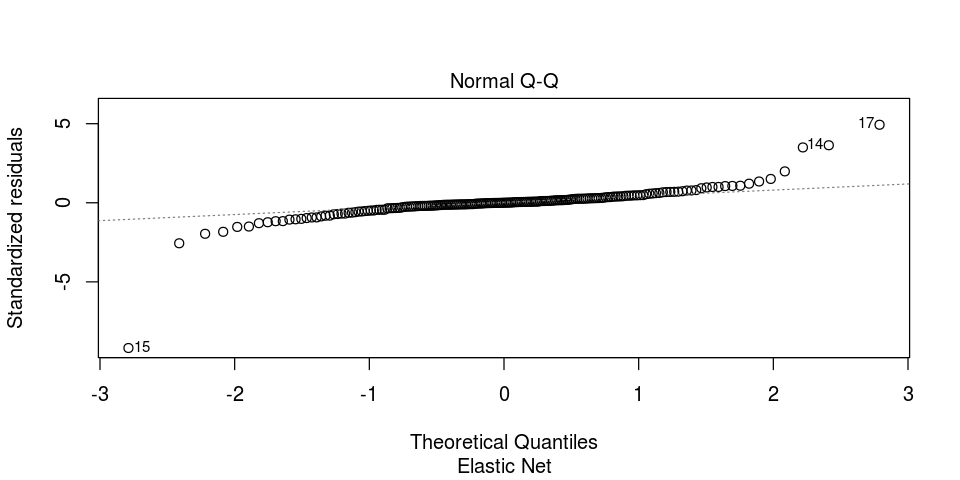

In [46]:
plot(lm.step, which =2, sub.caption= "StepAIC") 
plot(lm.svd,  which =2, sub.caption= "SVD") 
plot(lm.enet, which =2, sub.caption= "Elastic Net") 

StepAIC ahs the best-behaved standardized resicuals. Elastic Net has some heaviness in the tails; SVD has much more.

### $\sqrt{Standardized Residuals}$ vs. Fitted Values 

Warning message:
“not plotting observations with leverage one:
  18, 29, 43, 44, 47, 119”Warning message:
“not plotting observations with leverage one:
  18, 29, 43, 44, 47, 119”

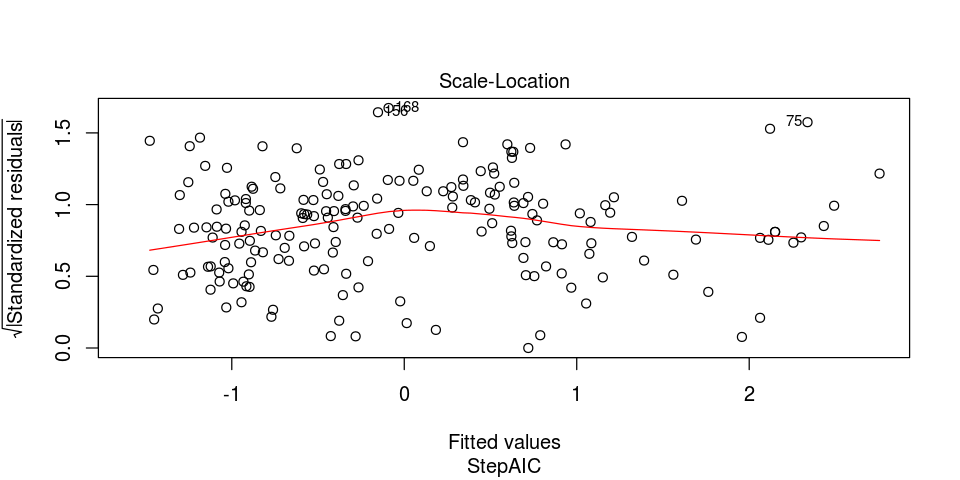

Warning message:
“not plotting observations with leverage one:
  18, 29, 43, 44, 47, 119”

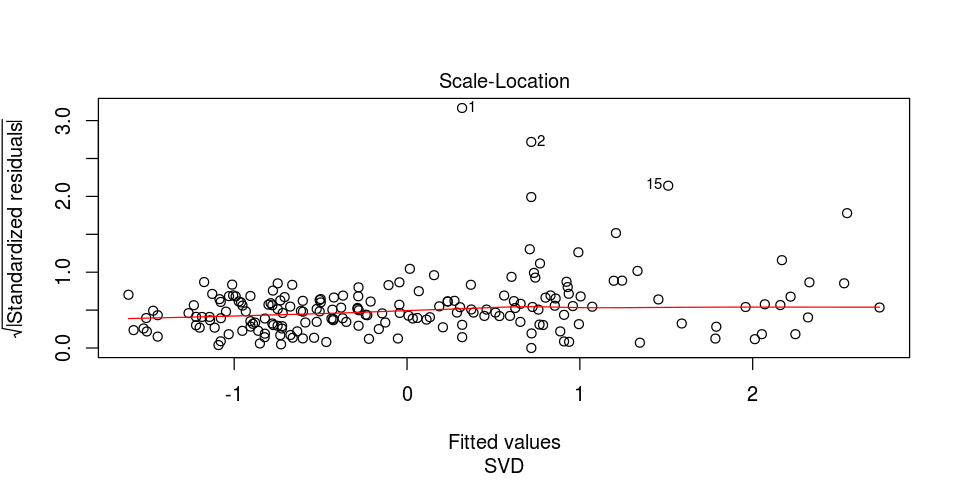

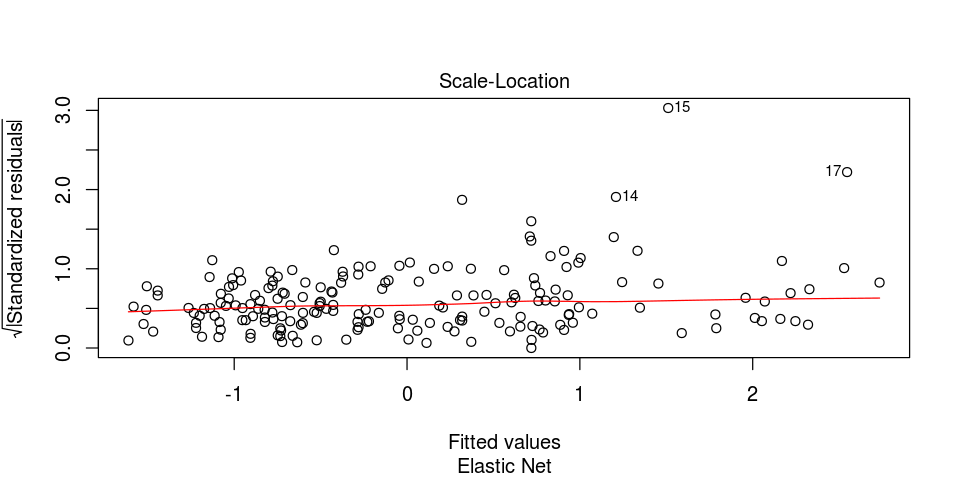

In [48]:
plot(lm.step, which =3, sub.caption="StepAIC") 
plot(lm.svd, which =3, sub.caption="SVD") 
plot(lm.enet, which =3, sub.caption="Elastic Net") 

Elastic Net & SVD exhibit about the same tighness, while Stepwise is significantly looser.

### Residuals vs. Leverage

Warning message:
“not plotting observations with leverage one:
  18, 29, 43, 44, 47, 119”Warning message in sqrt(crit * p * (1 - hh)/hh):
“NaNs produced”Warning message in sqrt(crit * p * (1 - hh)/hh):
“NaNs produced”Warning message:
“not plotting observations with leverage one:
  18, 29, 43, 44, 47, 119”Warning message in sqrt(crit * p * (1 - hh)/hh):
“NaNs produced”Warning message in sqrt(crit * p * (1 - hh)/hh):
“NaNs produced”

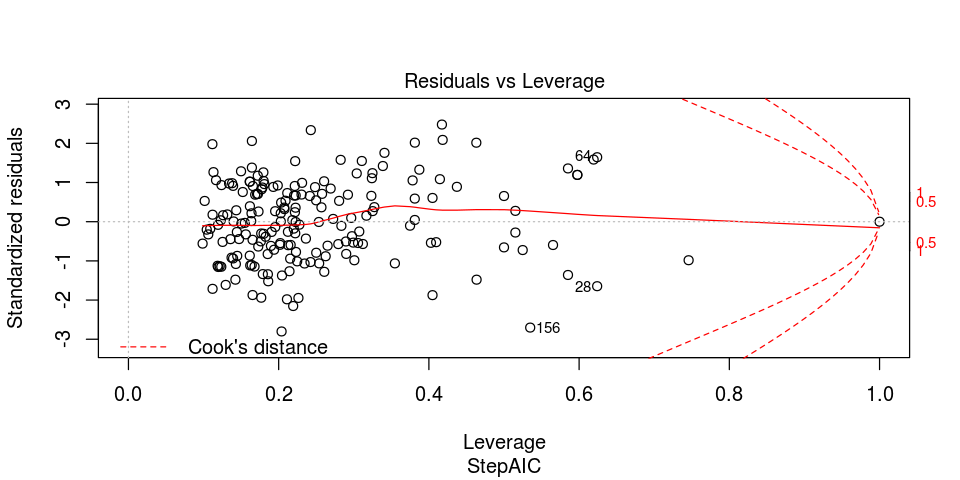

Warning message:
“not plotting observations with leverage one:
  18, 29, 43, 44, 47, 119”Warning message in sqrt(crit * p * (1 - hh)/hh):
“NaNs produced”Warning message in sqrt(crit * p * (1 - hh)/hh):
“NaNs produced”

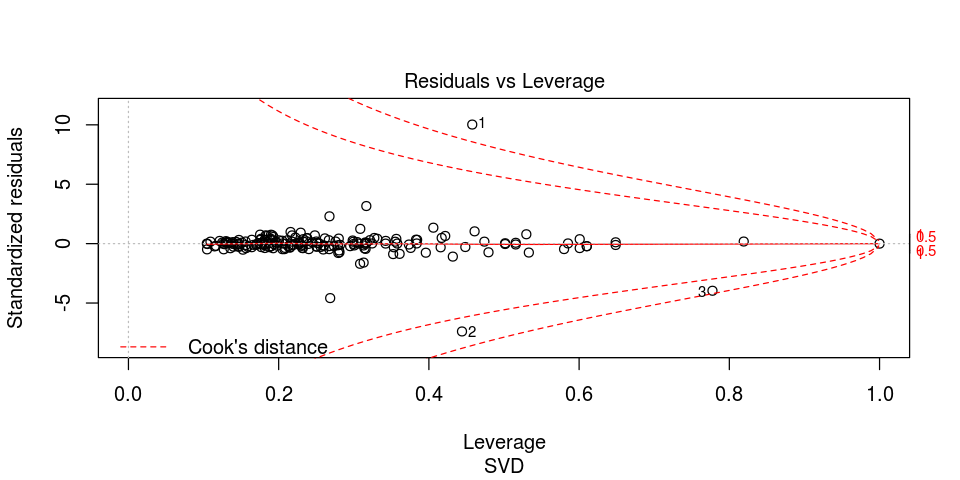

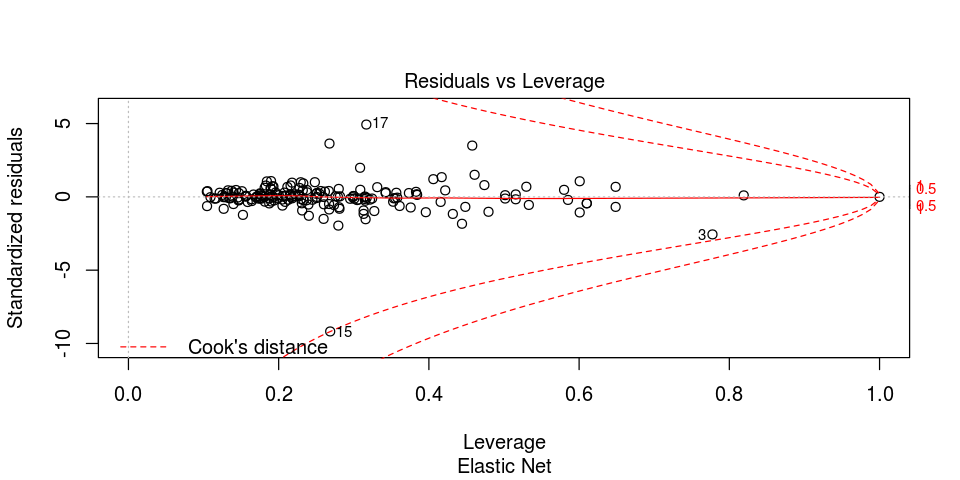

In [49]:
plot(lm.step, which =5, sub.caption="StepAIC") 
plot(lm.svd,  which =5, sub.caption="SVD") 
plot(lm.enet, which =5, sub.caption="Elastic Net")

Elastic Net & SVD appear tighter, but this is because their outliers are more extreme. Observing the y-axes, both have outliers near +/- 5 and +/- 10, while all of the Stepwise points fall within +/- 3. 

## Plot StepAIC results

ERROR while rich displaying an object: Error in eval(expr, envir, enclos): object 'resids' not found

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste(capture.output(print(obj)), collapse = "\n")
10. capture.output(print(obj))
11. evalVis(expr)
12. withVisible(eval(expr, pf))
13. eval(expr, pf)
14. eval(expr, envir, enclos)
15. print(obj)
16. print.ggplot(obj)
17. ggplot_build(x)
18. by_layer(fun

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


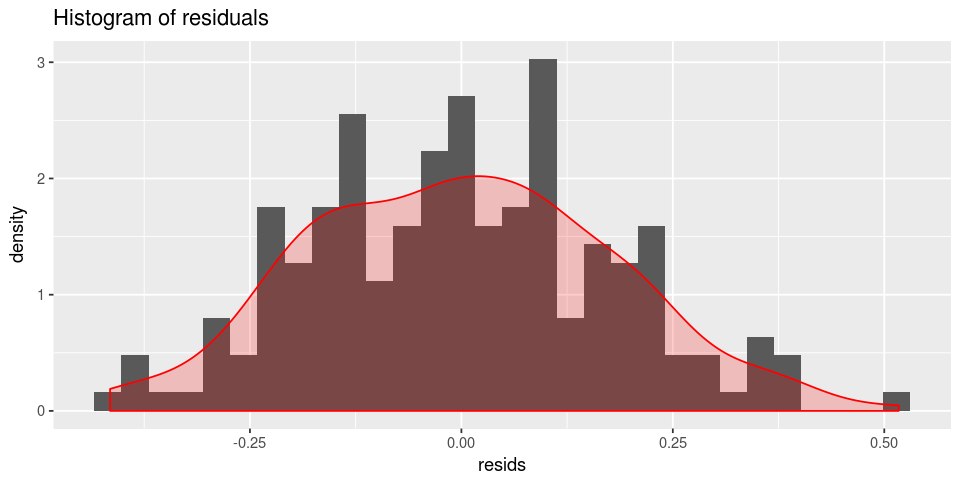

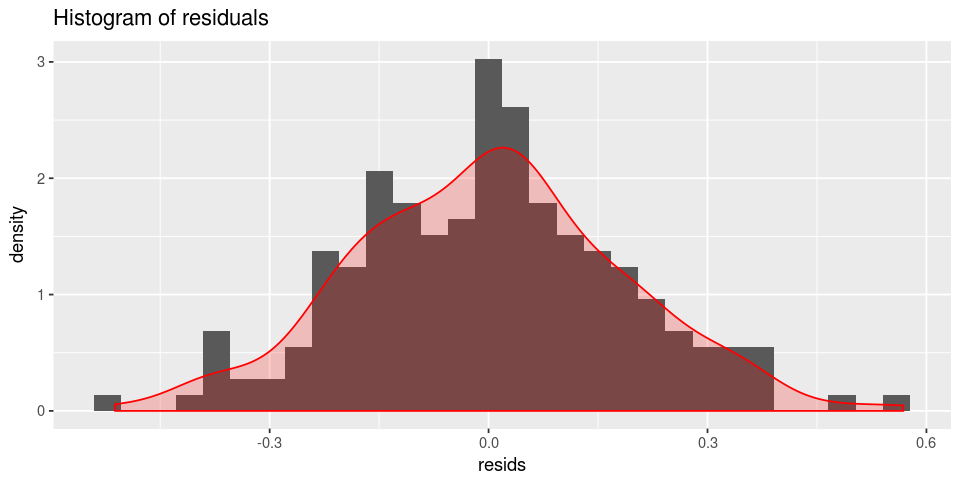

In [59]:
plot.resid.hist(lm.step)
plot.resid.hist(lm.svd)
plot.resid.hist(lm.enet)

## Plot SVD results

`geom_smooth()` using method = 'loess'
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


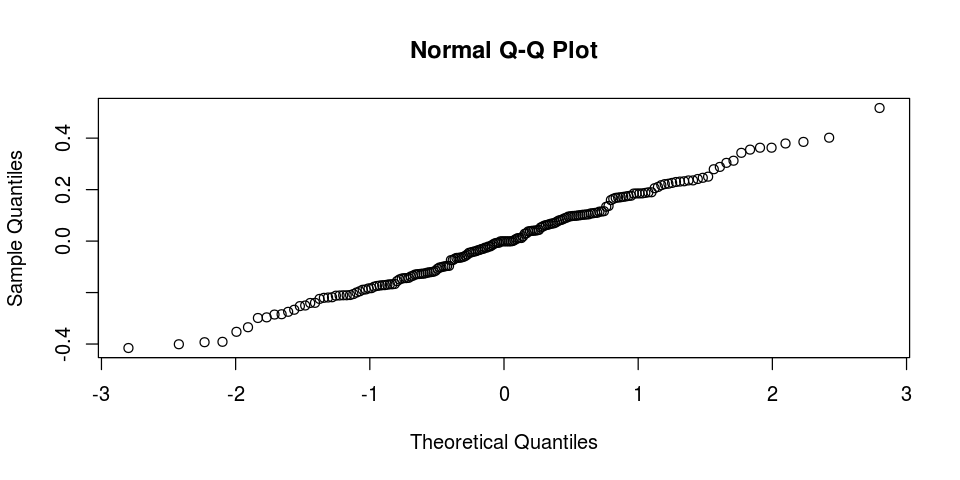

`geom_smooth()` using method = 'loess'


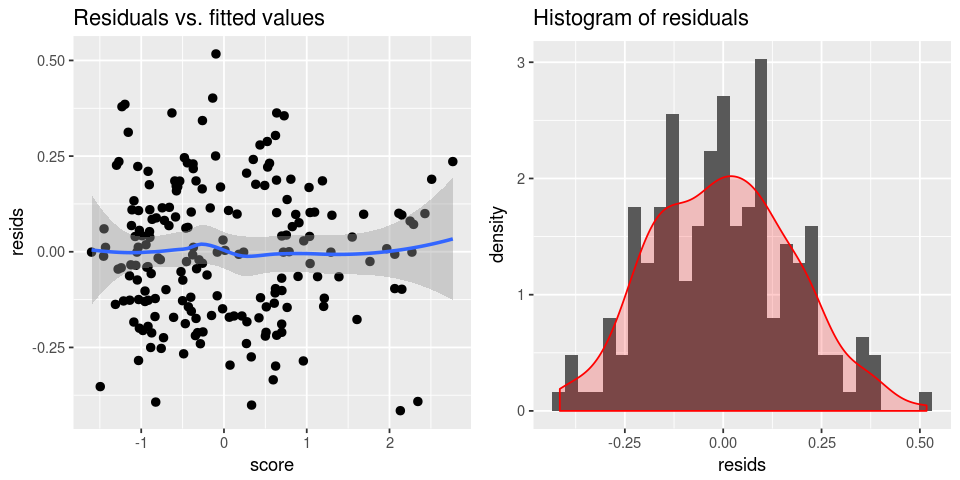

SSE = 193.075461566739 
SSR = 6.15045496395295 
SST = 199.225916530692 
RMSE = 1.00039099257378 
Adjusted R^2 = 0.968478306759932 


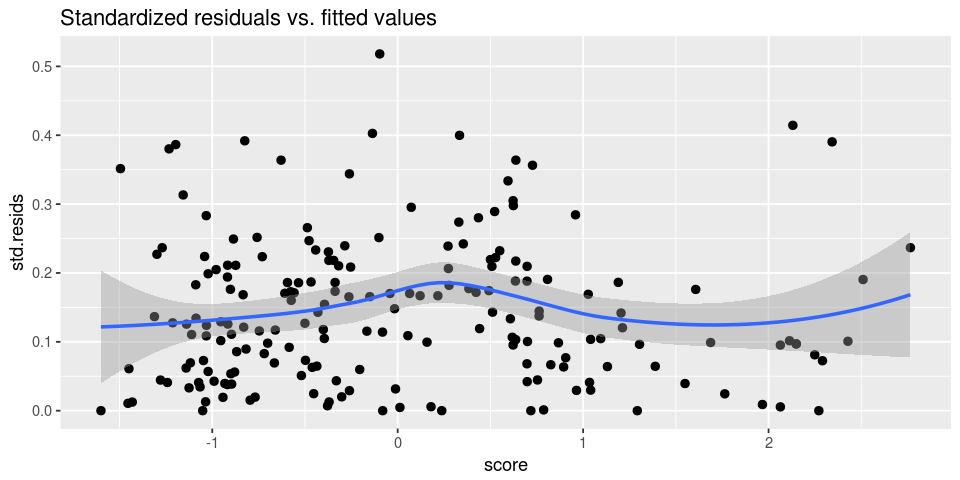

In [50]:
plot.svd.reg(autos.svd)

## Plot Elastic Net results

In [ ]:
lm.autos.enet = lm(logPrice ~ ., data = autos.enet)
plot(lm.autos.enet)